아래 네 가지 모델을 검증함
* (64, 64, 46)
* (32, 32, 46)
* (32, 32, 32, 46)
* (128, 46)

네번째 모델이 validation accuracy가 가장 좋았으나(0.826),   
오버피팅이 의심되어 오버피트가 덜 되었다고 생각하는 두번째 모델을 선택함   
test accuracy 결과 0.7890 얻음

In [263]:
import tensorflow as tf
import numpy as np
import random
import os
RANDOM_STATE = 9811
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)
os.environ["PYTHONHASHSEED"] = str(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

In [264]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)

/home/minhyuk/miniconda3/envs/keras/lib/python3.9/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/minhyuk/miniconda3/envs/keras/lib/python3.9/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [265]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000 + 1):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for word_index  in sequence:
            results[i, word_index] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [266]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [267]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

In [268]:
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)


In [269]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [270]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)


Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 3.3594 - accuracy: 0.2853 - val_loss: 1.9654 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.7049 - accuracy: 0.6874 - val_loss: 1.3485 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1302 - accuracy: 0.7741 - val_loss: 1.1559 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8616 - accuracy: 0.8280 - val_loss: 1.0544 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6878 - accuracy: 0.8605 - val_loss: 0.9750 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5443 - accuracy: 0.8913 - val_loss: 0.9394 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.4434 - accuracy: 0.9137 - val_loss: 0.9511 - val_accuracy: 0.8000
Epoch 8/20
16

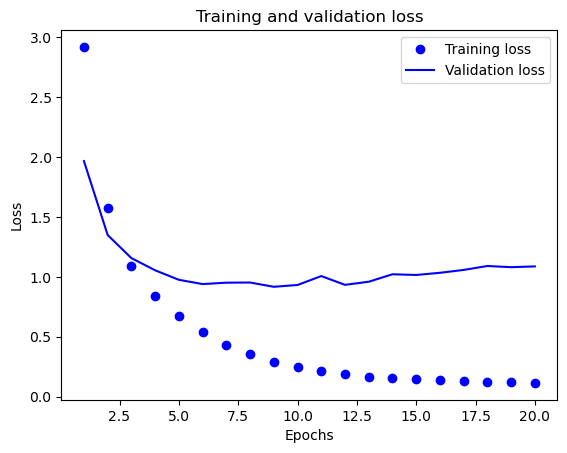

In [271]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
import matplotlib.pyplot as plt
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

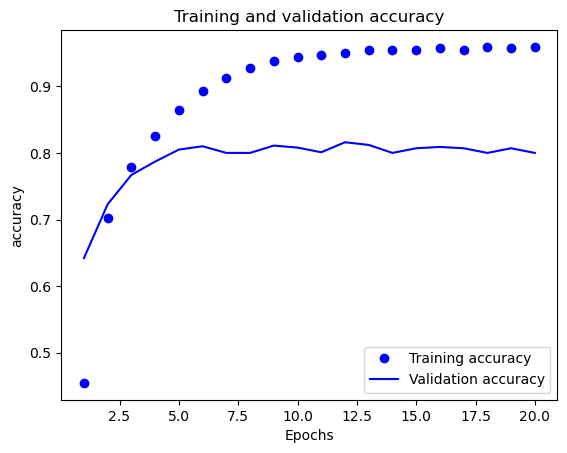

In [272]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = range(1, len(accuracy)+1)
import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [273]:
import pandas as pd

model_report = pd.DataFrame(
    np.stack(
        [
            history.history["loss"],
            history.history["val_loss"],
            history.history["accuracy"],
            history.history["val_accuracy"],
        ],
        axis=1,
    ),
    index=epochs,
    columns=[
        "Training loss",
        "Validation loss",
        "Training accuracy",
        "Validation accuracy",
    ],
)
model_report.to_csv("model_report.csv")
model_report

,Training loss,Validation loss,Training accuracy,Validation accuracy
1,2.917811,1.965438,0.454648,0.642
2,1.573935,1.348498,0.702957,0.723
3,1.089214,1.155889,0.779379,0.767
4,0.843703,1.054376,0.825858,0.787
5,0.673472,0.975029,0.864069,0.805
6,0.538073,0.939391,0.892508,0.810
7,0.432597,0.951077,0.912929,0.800
8,0.352135,0.952436,0.927086,0.800
9,0.292138,0.916750,0.938487,0.811
10,0.248680,0.931836,0.944751,0.808


In [274]:
from tensorflow import keras
from tensorflow.keras import layers
model1 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

In [275]:
model1.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)


In [276]:
history1 = model1.fit(
    partial_x_train,
    partial_y_train,
    epochs=18,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/18
16/16 [==============================] - 1s 31ms/step - loss: 3.5618 - accuracy: 0.2066 - val_loss: 2.7677 - val_accuracy: 0.5540
Epoch 2/18
16/16 [==============================] - 0s 20ms/step - loss: 2.5105 - accuracy: 0.5835 - val_loss: 1.9880 - val_accuracy: 0.6390
Epoch 3/18
16/16 [==============================] - 0s 16ms/step - loss: 1.7739 - accuracy: 0.6760 - val_loss: 1.5598 - val_accuracy: 0.6920
Epoch 4/18
16/16 [==============================] - 0s 17ms/step - loss: 1.3725 - accuracy: 0.7201 - val_loss: 1.3404 - val_accuracy: 0.7110
Epoch 5/18
16/16 [==============================] - 0s 19ms/step - loss: 1.1312 - accuracy: 0.7568 - val_loss: 1.2062 - val_accuracy: 0.7360
Epoch 6/18
16/16 [==============================] - 0s 17ms/step - loss: 0.9647 - accuracy: 0.7943 - val_loss: 1.1196 - val_accuracy: 0.7470
Epoch 7/18
16/16 [==============================] - 0s 16ms/step - loss: 0.8562 - accuracy: 0.8185 - val_loss: 1.0791 - val_accuracy: 0.7510
Epoch 8/18
16

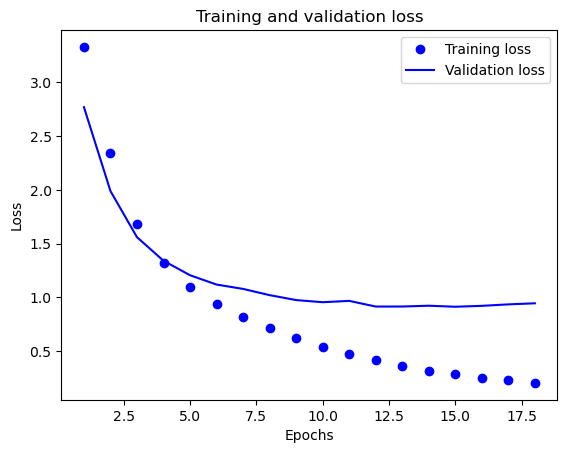

In [277]:
loss = history1.history["loss"]
val_loss = history1.history["val_loss"]
epochs = range(1, len(loss)+1)
import matplotlib.pyplot as plt
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

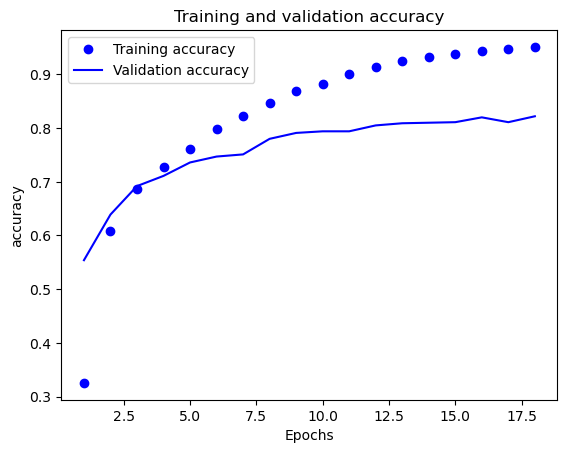

In [278]:
accuracy = history1.history["accuracy"]
val_accuracy = history1.history["val_accuracy"]
epochs = range(1, len(accuracy)+1)
import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [279]:
import pandas as pd

model1_report = pd.DataFrame(
    np.stack(
        [
            history1.history["loss"],
            history1.history["val_loss"],
            history1.history["accuracy"],
            history1.history["val_accuracy"],
        ],
        axis=1,
    ),
    index=epochs,
    columns=[
        "Training loss",
        "Validation loss",
        "Training accuracy",
        "Validation accuracy",
    ],
)
model1_report.to_csv("model1_report.csv")
model1_report


,Training loss,Validation loss,Training accuracy,Validation accuracy
1,3.327559,2.767708,0.325482,0.554
2,2.340489,1.988025,0.608995,0.639
3,1.681609,1.559755,0.687422,0.692
4,1.319638,1.340411,0.727888,0.711
5,1.100432,1.206157,0.761964,0.736
6,0.943049,1.119554,0.798046,0.747
7,0.819575,1.079057,0.822100,0.751
8,0.713642,1.021219,0.846530,0.780
9,0.621909,0.975434,0.868329,0.791
10,0.543165,0.955473,0.882486,0.794


In [280]:
from tensorflow import keras
from tensorflow.keras import layers
model2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

In [281]:
model2.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)


In [282]:
history2 = model2.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)


Epoch 1/20
16/16 [==============================] - 1s 35ms/step - loss: 3.5343 - accuracy: 0.2128 - val_loss: 2.5625 - val_accuracy: 0.4080
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 2.2929 - accuracy: 0.5037 - val_loss: 1.8038 - val_accuracy: 0.6090
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.6423 - accuracy: 0.6437 - val_loss: 1.5220 - val_accuracy: 0.6560
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 1.3303 - accuracy: 0.7133 - val_loss: 1.3725 - val_accuracy: 0.7000
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1338 - accuracy: 0.7539 - val_loss: 1.2619 - val_accuracy: 0.7230
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9759 - accuracy: 0.7841 - val_loss: 1.1921 - val_accuracy: 0.7430
Epoch 7/20
16/16 [==============================] - 0s 22ms/step - loss: 0.8695 - accuracy: 0.8106 - val_loss: 1.1613 - val_accuracy: 0.7400
Epoch 8/20
16

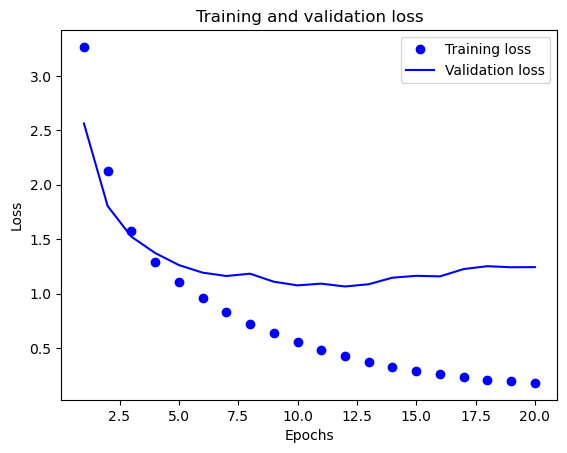

In [283]:
loss = history2.history["loss"]
val_loss = history2.history["val_loss"]
epochs = range(1, len(loss)+1)
import matplotlib.pyplot as plt
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

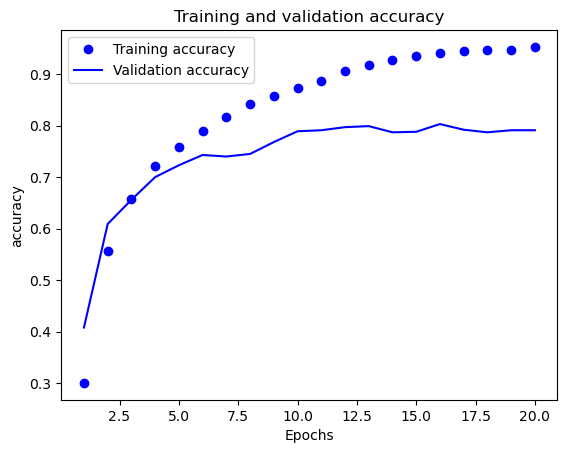

In [284]:
accuracy = history2.history["accuracy"]
val_accuracy = history2.history["val_accuracy"]
epochs = range(1, len(accuracy)+1)
import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [285]:
import pandas as pd

model2_report = pd.DataFrame(
    np.stack(
        [
            history2.history["loss"],
            history2.history["val_loss"],
            history2.history["accuracy"],
            history2.history["val_accuracy"],
        ],
        axis=1,
    ),
    index=epochs,
    columns=[
        "Training loss",
        "Validation loss",
        "Training accuracy",
        "Validation accuracy",
    ],
)
model2_report.to_csv("model2_report.csv")
model2_report


,Training loss,Validation loss,Training accuracy,Validation accuracy
1,3.265711,2.562539,0.300426,0.408
2,2.123725,1.803757,0.557379,0.609
3,1.571184,1.522022,0.657730,0.656
4,1.291147,1.372499,0.721624,0.700
5,1.106251,1.261861,0.758331,0.723
6,0.955231,1.192146,0.788649,0.743
7,0.831646,1.161290,0.816337,0.740
8,0.721662,1.182515,0.841644,0.745
9,0.633161,1.108866,0.858431,0.768
10,0.558279,1.075337,0.873089,0.789


In [286]:
from tensorflow import keras
from tensorflow.keras import layers
model3 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

In [287]:
model3.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)


In [288]:
history3 = model3.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 2.7157 - accuracy: 0.4825 - val_loss: 1.4108 - val_accuracy: 0.7090
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.1672 - accuracy: 0.7651 - val_loss: 1.0791 - val_accuracy: 0.7780
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7866 - accuracy: 0.8468 - val_loss: 0.9604 - val_accuracy: 0.8040
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5667 - accuracy: 0.8955 - val_loss: 0.8951 - val_accuracy: 0.8170
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4351 - accuracy: 0.9163 - val_loss: 0.8342 - val_accuracy: 0.8260
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.3345 - accuracy: 0.9347 - val_loss: 0.8242 - val_accuracy: 0.8260
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.2644 - accuracy: 0.9459 - val_loss: 0.8465 - val_accuracy: 0.8190
Epoch 8/20
16

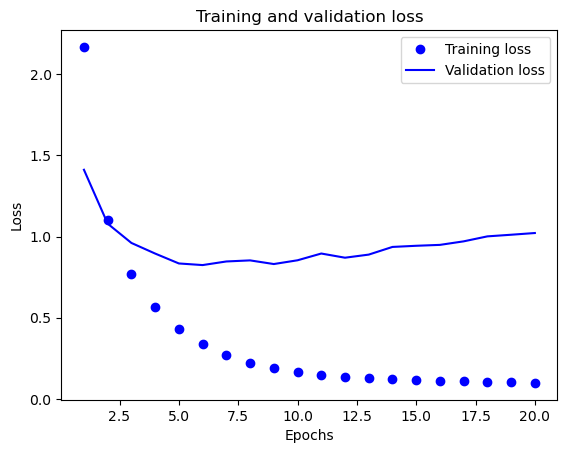

In [289]:
loss = history3.history["loss"]
val_loss = history3.history["val_loss"]
epochs = range(1, len(loss)+1)
import matplotlib.pyplot as plt
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

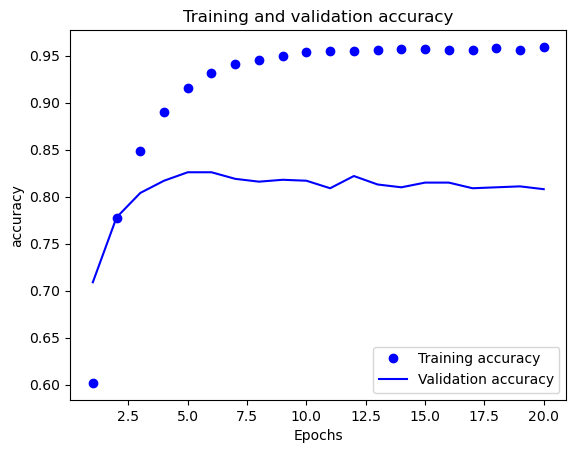

In [290]:
accuracy = history3.history["accuracy"]
val_accuracy = history3.history["val_accuracy"]
epochs = range(1, len(accuracy)+1)
import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [291]:
import pandas as pd

model3_report = pd.DataFrame(
    np.stack(
        [
            history3.history["loss"],
            history3.history["val_loss"],
            history3.history["accuracy"],
            history3.history["val_accuracy"],
        ],
        axis=1,
    ),
    index=epochs,
    columns=[
        "Training loss",
        "Validation loss",
        "Training accuracy",
        "Validation accuracy",
    ],
)
model3_report.to_csv("model3_report.csv")
model3_report


,Training loss,Validation loss,Training accuracy,Validation accuracy
1,2.166931,1.410824,0.601979,0.709
2,1.100650,1.079134,0.777625,0.778
3,0.768708,0.960426,0.848534,0.804
4,0.566323,0.895131,0.889877,0.817
5,0.433829,0.834191,0.915435,0.826
6,0.338946,0.824226,0.931346,0.826
7,0.270791,0.846454,0.941243,0.819
8,0.223652,0.853101,0.945001,0.816
9,0.191992,0.830593,0.949386,0.818
10,0.167366,0.853747,0.953896,0.817


In [292]:
reports = [model_report, model1_report, model2_report, model3_report]
max_scores = [(report["Validation accuracy"].max(), report["Validation accuracy"].argmax()) for report in reports]
max_scores

[(0.8159999847412109, 11),
 (0.8220000267028809, 17),
 (0.8029999732971191, 15),
 (0.8259999752044678, 4)]

In [293]:
from tensorflow import keras
from tensorflow.keras import layers
my_model = keras.models.load_model("my_reuter_model.h5")
my_model.evaluate(x_val, y_val)

32/32 [==============================] - 0s 6ms/step - loss: 0.9451 - accuracy: 0.8220


[0.9451432824134827, 0.8220000267028809]

In [295]:
my_model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 6ms/step - loss: 1.0541 - accuracy: 0.7890


[1.054113745689392, 0.7889581322669983]